Importar librerias

In [198]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

Cargar archivos de entrenamiento

In [199]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [200]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [201]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Visualizar archivos

In [202]:
df_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
747,748,1,2,"Sinkkonen, Miss. Anna",female,30.0,0,0,250648,13.0000,NaN,S
141,142,1,3,"Nysten, Miss. Anna Sofia",female,22.0,0,0,347081,7.7500,NaN,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
312,313,0,2,"Lahtinen, Mrs. William (Anna Sylfven)",female,26.0,1,1,250651,26.0000,NaN,S
514,515,0,3,"Coleff, Mr. Satio",male,24.0,0,0,349209,7.4958,NaN,S


In [203]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [204]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


Limpieza de dataset

In [205]:
df_train.duplicated().sum() # Cuantos valores duplicados hay

np.int64(0)

In [206]:
df_test.duplicated().sum() # valores duplicados

np.int64(0)

In [207]:
df_train.isnull().sum().sort_values(ascending=False) # valores nulos por columna
# cabin 687 Valores nulos
# edad 177
# embarked 2

,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Name,0
Pclass,0
Survived,0
Sex,0
Parch,0
SibSp,0


In [208]:
df_train.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


In [209]:
#menor a 10 valores unicos
columnas_categoricas = df_train.select_dtypes(include=['object']).columns
for column in columnas_categoricas:
    if df_train[column].nunique()<= 10: #numero de variables unicas menor a 10 que proceda a...
        print(f"{column}: {df_train[column].unique()}") # imprimir la columna que diga los valores unicos de cada columna

Sex: ['male' 'female']
Embarked: ['S' 'C' 'Q' nan]


In [210]:
columnas_numericas = df_train.select_dtypes(include=['int64','float64']).columns
for column in columnas_numericas:
    if df_train[column].nunique()<= 10: #numero de variables unicas menor a 10 que proceda a...
        print(f"{column}: {df_train[column].unique()}") # imprimir la columna que diga los valores unicos de cada columna

Survived: [0 1]
Pclass: [3 1 2]
SibSp: [1 0 3 4 2 5 8]
Parch: [0 1 2 5 3 4 6]


Analisis exploratorio

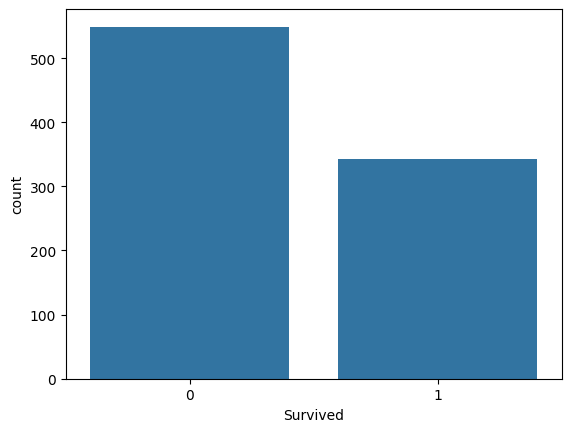

In [211]:
sns.countplot(x='Survived', data=df_train)
plt.show()

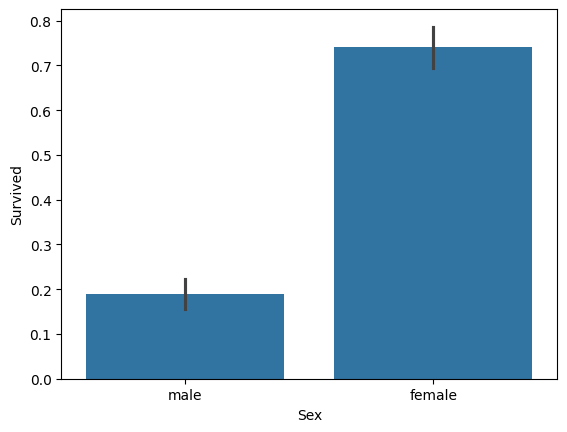

In [212]:
sns.barplot(x='Sex', y='Survived', data=df_train)
plt.show()

# conclusiones
* Passsenger ID, Cabin, Fare, Ticket y Name no aportan a la prediccion. Procede a eliminar del DS train

In [213]:
import numpy as np

In [214]:
train = df_train.drop(columns = ['PassengerId', 'Cabin', 'Fare', 'Ticket', 'Name'])
test = df_test.drop(columns = ['PassengerId', 'Cabin', 'Fare', 'Ticket', 'Name'])

train.head()
test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,34.5,0,0,Q
1,3,female,47.0,1,0,S
2,2,male,62.0,0,0,Q
3,3,male,27.0,0,0,S
4,3,female,22.0,1,1,S


Preparacion de los datos

In [215]:
X_train = train.drop(columns = ['Survived'])
Y_train = train['Survived']

x_test = test
x_test

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,34.5,0,0,Q
1,3,female,47.0,1,0,S
2,2,male,62.0,0,0,Q
3,3,male,27.0,0,0,S
4,3,female,22.0,1,1,S
...,...,...,...,...,...,...
413,3,male,NaN,0,0,S
414,1,female,39.0,0,0,C
415,3,male,38.5,0,0,S
416,3,male,NaN,0,0,S


In [216]:
X_train
Y_train

x_test

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,34.5,0,0,Q
1,3,female,47.0,1,0,S
2,2,male,62.0,0,0,Q
3,3,male,27.0,0,0,S
4,3,female,22.0,1,1,S
...,...,...,...,...,...,...
413,3,male,NaN,0,0,S
414,1,female,39.0,0,0,C
415,3,male,38.5,0,0,S
416,3,male,NaN,0,0,S


Conversion de variable categorica a numerica

In [217]:
a = (x_test.dtypes == 'object')
object_cols_test = list(a[a].index)

print("Categorical variables:")
print(object_cols_test)

Ordinal_Encoder = OrdinalEncoder()
x_test[object_cols_test] = Ordinal_Encoder.fit_transform(x_test[object_cols_test])

x_test

s = (X.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Ordinal_Encoder = OrdinalEncoder()
X[object_cols] = Ordinal_Encoder.fit_transform(X[object_cols])

X

Categorical variables:
['Sex', 'Embarked']
Categorical variables:
[]


,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1.0,22.0,1,0,2.0
1,1,0.0,38.0,1,0,0.0
2,3,0.0,26.0,0,0,2.0
3,1,0.0,35.0,1,0,2.0
4,3,1.0,35.0,0,0,2.0
...,...,...,...,...,...,...
886,2,1.0,27.0,0,0,2.0
887,1,0.0,19.0,0,0,2.0
888,3,0.0,NaN,1,2,2.0
889,1,1.0,26.0,0,0,0.0


In [218]:
# Rellenar valores nulos
imputer = SimpleImputer()
x_transformed = pd.DataFrame(imputer.fit_transform(X))

x_transformed.columns = X.columns


In [219]:
imputer = SimpleImputer()
x_test_transformed = pd.DataFrame(imputer.fit_transform(x_test))

x_test_transformed.columns = x_test.columns

In [220]:
x_transformed.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Embarked,0


In [221]:
x_test_transformed.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Embarked,0


In [222]:
#MODEL

model = RandomForestClassifier()
model.fit(x_transformed, Y)

RandomForestClassifier()

In [223]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    float64
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Embarked  418 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 19.7 KB


In [224]:
#Predictions
df_test_transformed = pd.DataFrame(imputer.transform(x_test))
df_test_transformed.columns = x_test.columns

predictions = model.predict(df_test_transformed)

In [225]:
#submission
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [226]:
result = pd.read_csv('gender_submission.csv')
result

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [227]:
result.set_index("PassengerId")

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [228]:
tasa_aprobacion = pd.merge(output, result, on='PassengerId').set_index("PassengerId")

In [230]:
tasa_aprobacion['resultado'] = tasa_aprobacion['Survived_x'] == tasa_aprobacion['Survived_y']
tasa_aprobacion['resultado'].value_counts(normalize=True)

,proportion
resultado,
True,0.782297
False,0.217703
